# Przykład algorytmu genetycznego do szukania ektremum globalengo.
### Jakub Suślik 

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import random 
import math as mt

In [66]:
def nbits(a, b, dx):
    r=b-a
    B=mt.ceil(mt.log2(r/dx+1))
    dx_new =r/(2**B-1) 
    return B, dx_new

def gen_population(P, N, B):
    pop=np.random.randint(2, size=(P,N*B))
    return pop

def decode_individual(individual, N, B, a, dx):
    individual=np.array(individual)
    individual=individual.reshape(N,B) 
    for j in range(0,N):
        for i in range(0,B):
            individual[j,B-i-1]=individual[j,B-i-1]*2**i
    r=np.sum(individual, axis=1)
    decode_individual=a+dx*r
    return decode_individual

def evaluate_population(func, pop, N, B, a, dx):
    evaluated_pop=[]
    for i, ind in enumerate(pop):
        evaluated_pop.append(func(decode_individual(ind,N,B,a,dx)))
    evaluated_pop=np.array(evaluated_pop)
    return evaluated_pop

    
def get_best(pop, evaluated_pop):
    best_value=max(evaluated_pop)
    for i in range(0,len(evaluated_pop)):
        if evaluated_pop[i]==best_value:
            best_individual=pop[i]
    return best_individual, best_value



def roulette(pop, evaluated_pop):
    new_pop = random.choices(pop, weights = evaluated_pop*(1/sum(evaluated_pop)), k = len(pop))
    new_pop = np.asarray(new_pop)
    return new_pop

def cross(pop, pk):
    new_pop=np.empty_like(pop)
    podzial=random.randint(1,len(pop[0])-1)
    for i in range(len(pop)):
        r=random.random()
        if pk > r:
            new_pop[i]=np.append(pop[i][:podzial],pop[(i+1)%len(pop)][podzial:])
        else:
            new_pop[i]=pop[i]
    return new_pop

def mutate(pop, pm):
    new_pop=pop
    for i in range(len(pop)):
        for j in range(len(pop[0])):
            r=random.random()
            if pm > r:
                if new_pop[i][j]==1:
                    new_pop[i][j]=0
                else:
                    new_pop[i][j]=1
            else:
                None
    return new_pop

def crossn(pop,pk,N,B):
    new_pop=np.empty_like(pop)
    podzial=random.randint(1,B-1)
    for i in range(len(pop)):
        r=random.random()
        if pk > r:
            ch=np.reshape(pop[i],(N,B))
            chn=np.reshape(pop[(i+1)%len(pop)],(N,B))
            kch=np.empty_like(ch)
            for j in range(N):
                kch[j]=np.append(ch[j][:podzial],chn[j][podzial:])
            new_pop[i]=np.reshape(kch,(1,N*B))
        else:
            new_pop[i]=pop[i]
    return new_pop

def gen_for_plot(pop, evaluated_pop,P,N,B,a,dx):
    gen=np.empty((P,N+1))
    for i,ind in enumerate(pop):
        roz=decode_individual(ind,N,B,a,dx)
        gen[i] = roz[0],roz[1],evaluated_pop[i]
    return gen

In [67]:
def evolve(fun, pop_size, pk, pm, generations,dx,a,N,info=False):
    func=fun
    P=pop_size
    b=-a
    bits=nbits(a,b,dx)
    B=bits[0]
    dx_new=bits[1]
    m=generations//2
 
    pop=gen_population(P,N,B)

    
    
    best_generation=0 #indeks z którego pochodzi best sol
    list_best=[]
    index_list_best = [] #jak jest gorzej w nastepnym pokoleniu to nie append wartośc funkcji 
    list_best_generation=[] #append kazdą wartość funkcji
    list_sol_generation=[] #append kazde rozwiazanie 
    list_mean=[] #append kazda średnia

    eval_pop=evaluate_population(func,pop,N,B,a,dx_new)
    first_pop=gen_for_plot(pop,eval_pop,P,N,B,a,dx_new)
    roz=get_best(pop,eval_pop)
    list_sol_generation.append(roz[0])
    list_best_generation.append(roz[1])
    list_mean.append(np.mean(eval_pop))
    best_sol=roz[0]
    list_best.append(roz[1])
    index_list_best.append(1)
    #znajdź i zapamiętaj najlepsze rozwiązanie
    #uaktualnij listy statystyk
    
    for i in range(generations):
        pop=roulette(pop,eval_pop)
        pop=cross(pop,pk)
        pop=mutate(pop,pm)
        eval_pop=evaluate_population(func,pop,N,B,a,dx_new)
        roz=get_best(pop,eval_pop)
        list_sol_generation.append(roz[0])
        list_best_generation.append(roz[1])
        list_mean.append(np.mean(eval_pop))
        if list_best[-1]<roz[1]:
            list_best.append(roz[1])
            index_list_best.append(i)
            best_sol=roz[0]
            best_generation=i
        else: 
            None
        
        if i==m: 
            middle_pop = gen_for_plot(pop,eval_pop,P,N,B,a,dx_new)
    
    last_pop = gen_for_plot(pop,eval_pop,P,N,B,a,dx_new)

    best_decode = decode_individual(best_sol,N,B,a,dx_new)

    if info==True:
        print('Najlepszy zakodowany osobnik: \n ',best_sol, ' \n Rozkodowany: ',best_decode,'\n Najlepsza wartość funkcji pomocniczej: ', obj_func_for_max(best_decode),' \n Wartosc minimum globalnego dla funkcji celu: ', obj_func(best_decode))
        
        
    return best_sol, best_generation, list_best, index_list_best, list_best_generation, list_mean, list_sol_generation, best_decode, first_pop, middle_pop, last_pop

In [68]:
def obj_func(x):
    return 0.5 + ((np.cos(np.sin(abs(x[0]**2-x[1]**2))))**2-0.5)/((1+0.001*(x[0]**2+x[1]**2))**2)

Zródło: https://www.sfu.ca/~ssurjano/schaffer4.html

https://en.wikipedia.org/wiki/Test_functions_for_optimization

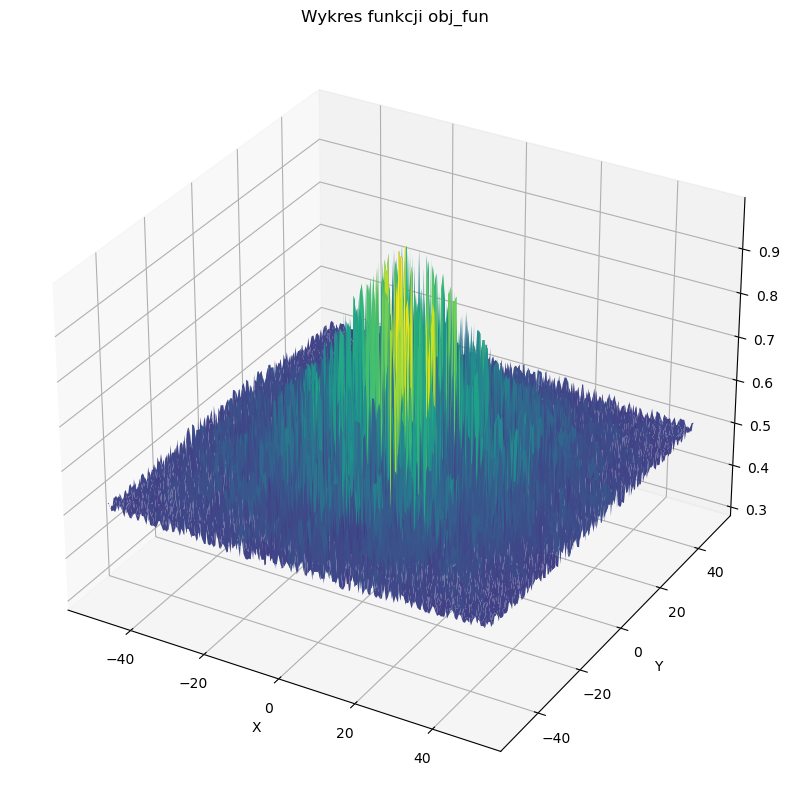

In [70]:
x = np.linspace(-50,50, 200)
y = np.linspace(-50, 50, 200)
X, Y = np.meshgrid(x, y)
Z = obj_func([X, Y])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wykres funkcji obj_fun')

plt.show()

Aby znaleść minimum glablane funkcji, zamiast minimaliziować funkcję, mozemy szukać maksimum globalnego funkcji z przeciwnym znakiem przy ilorazie. 

In [71]:
def obj_func_for_max(x):
    return 0.5 - ((np.cos(np.sin(abs(x[0]**2-x[1]**2))))**2-0.5)/((1+0.001*(x[0]**2+x[1]**2))**2)

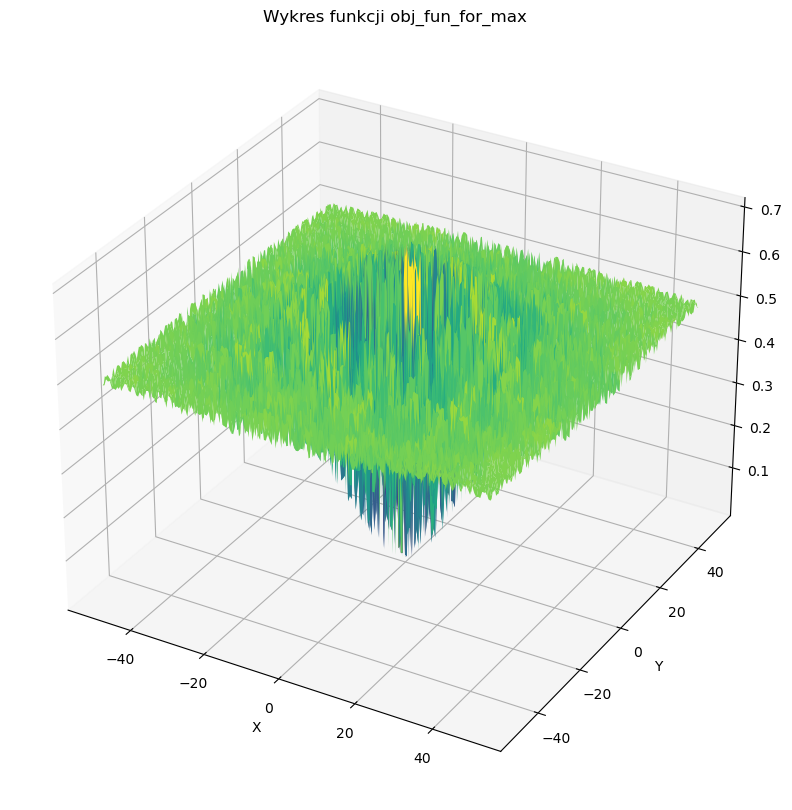

In [72]:
x = np.linspace(-50,50, 200)
y = np.linspace(-50, 50, 200)
X, Y = np.meshgrid(x, y)
Z = obj_func_for_max([X, Y])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wykres funkcji obj_fun_for_max')

plt.show()

In [73]:
fun, pop_size, pk, pm, generations,dx,a,N = obj_func_for_max, 200, 0.7, 0.01, 400, 1e-10, -10, 2
solve = evolve(fun, pop_size, pk, pm, generations,dx,a,N,True)
best_sol, best_generation, list_best, index_list_best, list_best_generation, list_mean, list_sol_generation, best_decode ,first_pop, middle_pop, last_pop = solve


Najlepszy zakodowany osobnik: 
  [1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1
 0 1]  
 Rozkodowany:  [ 0.00312583 -1.25277071] 
 Najlepsza wartość funkcji pomocniczej:  0.7074209806619304  
 Wartosc minimum globalnego dla funkcji celu:  0.2925790193380696


Wykresy dla początkowe, srodkowej oraz ostatniej populacji. 

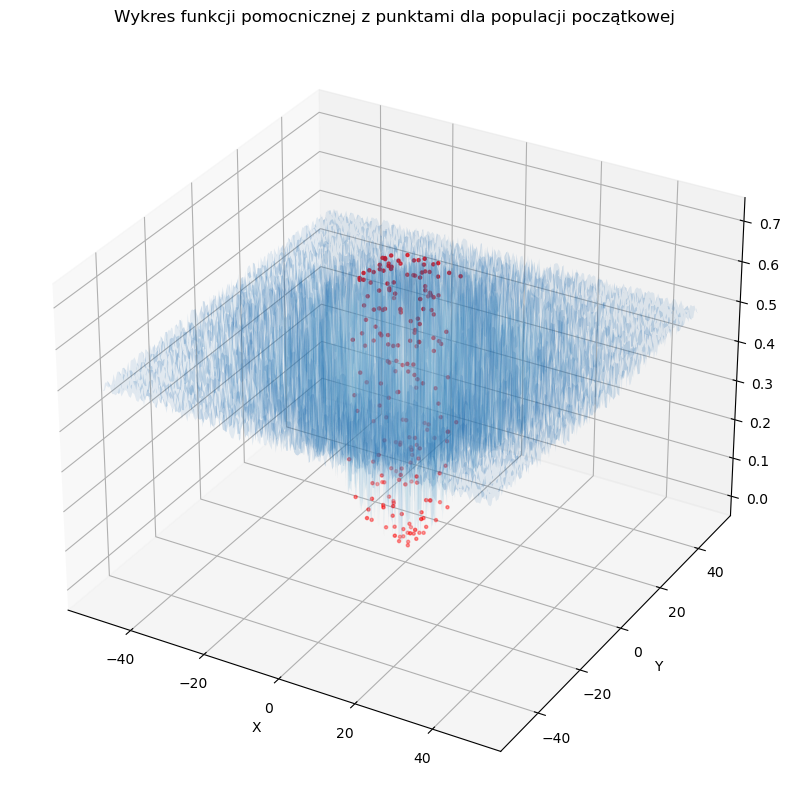

In [74]:
x = np.linspace(-50,50, 200)
y = np.linspace(-50,50, 200)
X, Y = np.meshgrid(x, y)
Z = obj_func_for_max([X, Y])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='Blues',alpha=0.1)


X_points = first_pop[:,0]  
Y_points = first_pop[:,1]
z_points = first_pop[:,2]  

ax.scatter(X_points, Y_points, z_points, color='red', s=5)  



plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wykres funkcji pomocnicznej z punktami dla populacji początkowej')

plt.show()

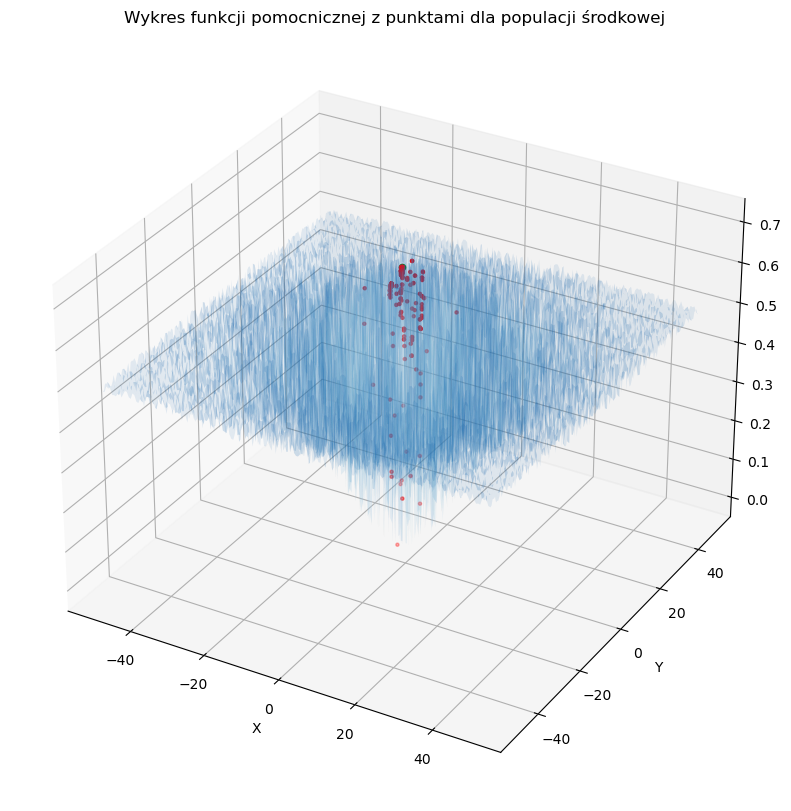

In [75]:
x = np.linspace(-50,50, 200)
y = np.linspace(-50,50, 200)
X, Y = np.meshgrid(x, y)
Z = obj_func_for_max([X, Y])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='Blues',alpha=0.1)

max_p = np.argmax(middle_pop[:,2])

ax.scatter(middle_pop[max_p,0],middle_pop[max_p,1],middle_pop[max_p,2],color='green', s=20)

X_points = middle_pop[:,0]  
Y_points = middle_pop[:,1]
z_points = middle_pop[:,2]  

ax.scatter(X_points, Y_points, z_points, color='red', s=5)  


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wykres funkcji pomocnicznej z punktami dla populacji środkowej')

plt.show()

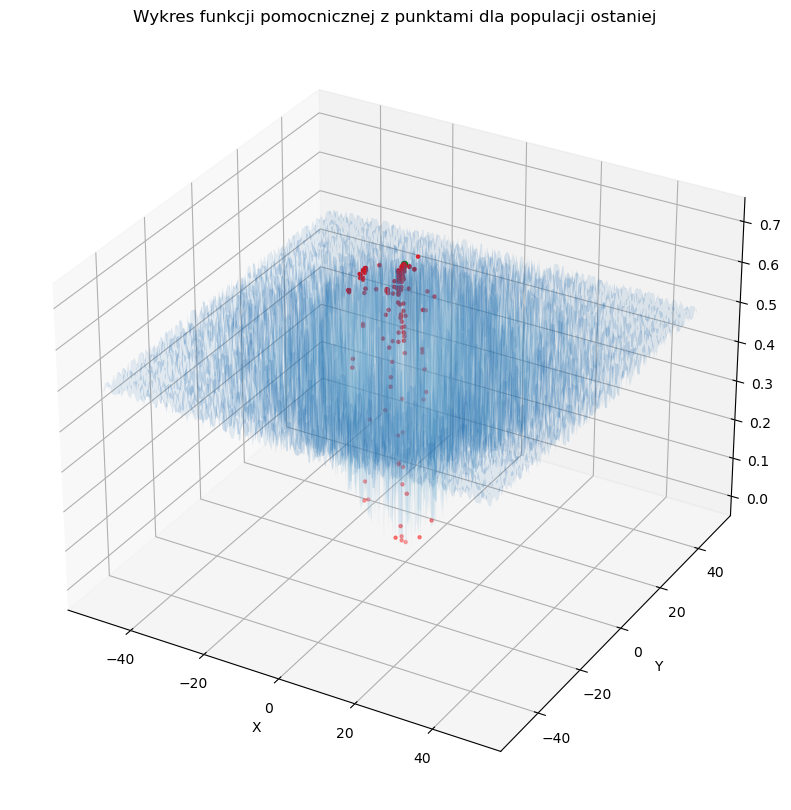

In [76]:
x = np.linspace(-50,50, 200)
y = np.linspace(-50,50, 200)
X, Y = np.meshgrid(x, y)
Z = obj_func_for_max([X, Y])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='Blues',alpha=0.1)

max_p = np.argmax(last_pop[:,2])

ax.scatter(last_pop[max_p,0],last_pop[max_p,1],last_pop[max_p,2],color='green', s=20)

X_points = last_pop[:,0]  
Y_points = last_pop[:,1]
z_points = last_pop[:,2]  

ax.scatter(X_points, Y_points, z_points, color='red', s=5)  


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wykres funkcji pomocnicznej z punktami dla populacji ostaniej')

plt.show()

Średnie wyniki algorytmu dla 10 powtórzeń. 

In [64]:
fun, pop_size, pk, pm, generations,dx,a,N = obj_func_for_max, 200, 0.7, 0.01, 400, 1e-10, -10, 2
exec_num = 10
best_list_for_iter=[]
best_gen = []
for i in range(exec_num):
    solve=evolve(fun, pop_size, pk, pm, generations,dx,a,N)
    best_sol, best_generation, list_best, index_list_best, list_best_generation, list_mean, list_sol_generation, best_decode ,first_pop, middle_pop, last_pop = solve
    best_list_for_iter.append(obj_func_for_max(best_decode))
    best_gen.append(best_generation)

mean=np.mean(best_list_for_iter)
std=np.std(best_list_for_iter)
print('Średnia z najlepszych rozwiązań: ',mean,'.   Odchylenie standardowe: ',std,'. \n Lista z numerami generacji w najlepszymi rozwiązaniami z kazdej pętli: ',best_gen)


Średnia z najlepszych rozwiązań:  0.70739853933074 .   Odchylenie standardowe:  4.825587783884405e-05 . 
 Lista z numerami generacji w najlepszymi rozwiązaniami z kazdej pętli:  [212, 50, 385, 214, 345, 248, 10, 328, 393, 246]
